<a href="https://colab.research.google.com/github/LuanNguyen-git/Template/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
# Tạo dữ liệu chuỗi thời gian mẫu
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Thay đổi đường dẫn đến file .xlsx của bạn tại đây
file_path = '/content/drive/MyDrive/Articles/Article 09/Code/MATLAB/CPI_VN.xlsx'

# Đọc file .xlsx vào DataFrame
try:
    df = pd.read_excel(file_path)
    print("Đã đọc file thành công!")
    display(df.head())
except FileNotFoundError:
    print(f"Lỗi: Không tìm thấy file tại đường dẫn {file_path}. Vui lòng kiểm tra lại đường dẫn.")
except Exception as e:
    print(f"Đã xảy ra lỗi khi đọc file: {e}")

Mounted at /content/drive
Đã đọc file thành công!


,month,cpi
0,1995-01,103.8
1,1995-02,103.4
2,1995-03,100.2
3,1995-04,101.0
4,1995-05,101.8


In [ ]:
cpi_data = df['cpi'].values
print("Dữ liệu CPI đã được trích xuất:")
display(cpi_data)

Dữ liệu CPI đã được trích xuất:


array([103.8 , 103.4 , 100.2 , 101.  , 101.8 , 100.8 , 100.  , 100.3 ,
       100.5 , 100.1 , 100.1 , 100.3 , 100.9 , 102.5 , 100.8 , 100.1 ,
        99.5 ,  99.5 ,  99.3 ,  99.6 , 100.3 , 100.1 , 100.9 , 101.  ,
       100.8 , 101.8 ,  99.5 ,  99.4 ,  99.5 , 100.1 , 100.2 , 100.1 ,
       100.6 , 100.3 , 100.3 , 101.  , 101.6 , 102.2 ,  99.2 , 101.6 ,
       101.4 , 100.  ,  99.5 , 101.1 , 101.  , 100.3 , 100.1 , 100.8 ,
       101.7 , 101.9 ,  99.3 ,  99.4 ,  99.6 ,  99.7 ,  99.6 ,  99.6 ,
        99.4 ,  99.  , 100.4 , 100.5 , 100.4 , 101.6 ,  98.9 ,  99.3 ,
        99.4 ,  99.5 ,  99.4 , 100.1 ,  99.8 , 100.1 , 100.9 , 100.1 ,
       100.3 , 100.4 ,  99.3 ,  99.5 ,  99.8 , 100.  ,  99.8 , 100.  ,
       100.5 , 100.  , 100.2 , 101.  , 101.1 , 102.2 ,  99.2 , 100.  ,
       100.3 , 100.1 ,  99.9 , 100.1 , 100.2 , 100.3 , 100.3 , 100.3 ,
       100.9 , 102.2 ,  99.4 , 100.  ,  99.9 ,  99.7 ,  99.7 ,  99.9 ,
       100.1 ,  99.8 , 100.6 , 100.8 , 101.1 , 103.  , 100.8 , 100.5 ,
      

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập train và test trước
train_size = int(len(cpi_data) * 0.67)
test_data = cpi_data[train_size:]
train_validation_data = cpi_data[:train_size]

# Chuẩn hóa dữ liệu tập train và validation
scaler = MinMaxScaler(feature_range=(0, 1))
train_validation_data_scaled = scaler.fit_transform(train_validation_data.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.reshape(-1, 1)) # Sử dụng cùng scaler để chuẩn hóa tập test

# Tách tập train_validation thành train và validation
validation_size = int(len(train_validation_data_scaled) * 0.15 / 0.67) # Tính toán lại kích thước validation dựa trên tập train_validation
train_data_scaled = train_validation_data_scaled[0:len(train_validation_data_scaled) - validation_size, :]
validation_data_scaled = train_validation_data_scaled[len(train_validation_data_scaled) - validation_size:, :]


# Tạo tập dữ liệu cho mô hình (với look_back đã được định nghĩa trước đó)
X_train, y_train = create_dataset(train_data_scaled, look_back)
X_validation, y_validation = create_dataset(validation_data_scaled, look_back)
X_test, y_test = create_dataset(test_data_scaled, look_back)

# Định dạng lại cho LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("Dữ liệu đã được chuẩn hóa và chia thành các tập train, validation, test.")
print("Kích thước tập train:", X_train.shape, y_train.shape)
print("Kích thước tập validation:", X_validation.shape, y_validation.shape)
print("Kích thước tập test:", X_test.shape, y_test.shape)

Dữ liệu đã được chuẩn hóa và chia thành các tập train, validation, test.
Kích thước tập train: (187, 1, 1) (187, 1)
Kích thước tập validation: (52, 1, 1) (52, 1)
Kích thước tập test: (118, 1, 1) (118, 1)


In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_validation, y_validation))

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1766 - val_loss: 0.0861
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1492 - val_loss: 0.0660
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1216 - val_loss: 0.0489
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0926 - val_loss: 0.0346
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0698 - val_loss: 0.0230
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0577 - val_loss: 0.0142
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0438 - val_loss: 0.0082
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0277 - val_loss: 0.0047
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0273 - val_loss: 0.0032
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0201 - val_loss: 0.0032
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0178 - val_loss: 0.0039
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0229 - val_lo

In [ ]:
# Dự đoán
pred = model.predict(X_test)
# Khử chuẩn kết quả dự báo
pred = scaler.inverse_transform(pred)
print(pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[100.35924 ]
 [100.40768 ]
 [100.42712 ]
 [100.55922 ]
 [100.742744]
 [100.964584]
 [100.87842 ]
 [100.19142 ]
 [ 99.93334 ]
 [ 99.56193 ]
 [100.25822 ]
 [100.593735]
 [100.4661  ]
 [100.306206]
 [100.33028 ]
 [100.31583 ]
 [100.26781 ]
 [100.32064 ]
 [100.30139 ]
 [101.02574 ]
 [100.14398 ]
 [100.25344 ]
 [100.34957 ]
 [100.364075]
 [100.574   ]
 [100.39313 ]
 [ 99.979744]
 [100.17717 ]
 [100.42712 ]
 [100.18667 ]
 [100.364075]
 [100.76276 ]
 [100.613495]
 [100.35924 ]
 [100.45634 ]
 [100.60854 ]
 [100.4661  ]
 [100.2726  ]
 [100.4661  ]
 [100.34475 ]
 [100.46121 ]
 [100.26781 ]
 [100.52482 ]
 [100.49053 ]
 [100.162926]
 [100.11091 ]
 [100.27739 ]
 [100.402824]
 [100.49053 ]
 [100.70283 ]
 [100.80286 ]
 [100.31102 ]
 [100.39313 ]
 [100.33028 ]
 [100.42226 ]
 [100.78278 ]
 [100.162926]
 [100.306206]
 [100.296585]
 [100.35441 ]
 [100.50522 ]
 [100.2726  ]
 [100.41254 ]
 [100.431984]
 [100.335106]]


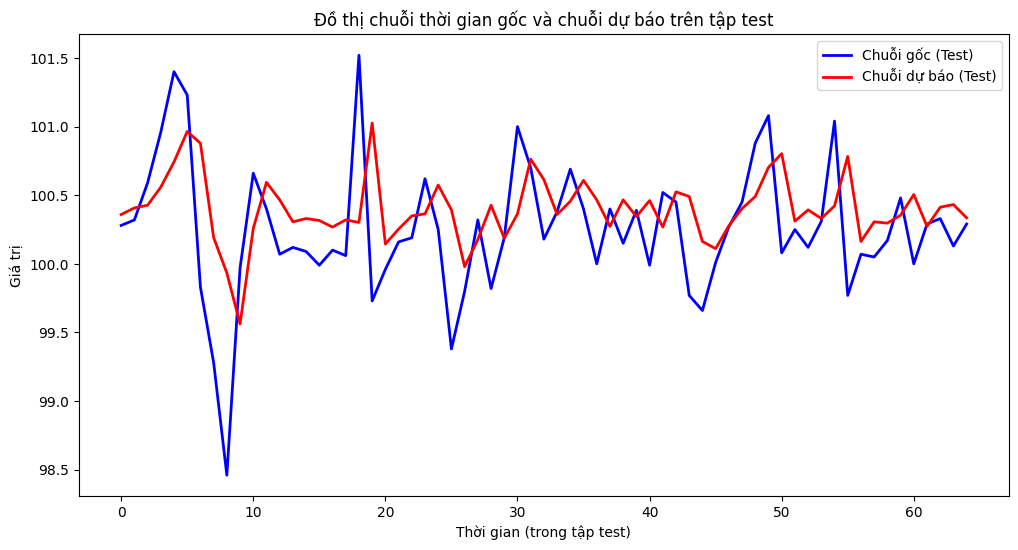

In [ ]:
import matplotlib.pyplot as plt

# Lấy dữ liệu gốc cho tập kiểm tra (chỉ lấy phần tương ứng với các điểm dự báo)
original_test_data = scaler.inverse_transform(y_test)

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
# Plot original test data
plt.plot(original_test_data, label='Chuỗi gốc (Test)', linestyle='-', linewidth=2, color='blue')
# Plot predicted test data
plt.plot(pred, label='Chuỗi dự báo (Test)', linestyle='-', linewidth=2, color='red')

plt.title('Đồ thị chuỗi thời gian gốc và chuỗi dự báo trên tập test')
plt.xlabel('Thời gian (trong tập test)')
plt.ylabel('Giá trị')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Lấy dữ liệu gốc cho tập kiểm tra (đã khử chuẩn)
original_test_data_denormalized = scaler.inverse_transform(y_test)

# Tạo DataFrame
results_df = pd.DataFrame({
    'Original (Test)': original_test_data_denormalized.flatten(),
    'Predicted (Test)': pred.flatten()
})

print("DataFrame chứa dữ liệu gốc và dự báo trên tập kiểm tra:")
display(results_df)

DataFrame chứa dữ liệu gốc và dự báo trên tập kiểm tra:


,Original (Test),Predicted (Test)
0,100.28,100.339767
1,100.32,100.371681
2,100.59,100.408287
3,100.96,100.521881
4,101.40,100.691193
...,...,...
60,100.00,100.446175
61,100.29,100.342827
62,100.33,100.383583
63,100.13,100.413239


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

# Tính toán RMSE, MAE, MSE
rmse = np.sqrt(mean_squared_error(results_df['Original (Test)'], results_df['Predicted (Test)']))
mae = mean_absolute_error(results_df['Original (Test)'], results_df['Predicted (Test)'])
smape_value = smape(results_df['Original (Test)'], results_df['Predicted (Test)'])


print(f"RMSE trên tập kiểm tra: {rmse:.4f}")
print(f"MAE trên tập kiểm tra: {mae:.4f}")
print(f"SMAPE trên tập kiểm tra: {smape_value:.4f}%")

RMSE trên tập kiểm tra: 0.5087
MAE trên tập kiểm tra: 0.3760
SMAPE trên tập kiểm tra: 0.3750%


# Task
Write Python code to automatically cluster CPI time series data.

## Prepare time series data for clustering

### Subtask:
Reshape the CPI data to be suitable for clustering algorithms.


**Reasoning**:
Reshape the `cpi_data` array into a 2D array for clustering.



In [ ]:
cpi_data_reshaped = cpi_data.reshape(-1, 1)
print("Dữ liệu CPI đã được định hình lại:")
display(cpi_data_reshaped)

Dữ liệu CPI đã được định hình lại:


array([[103.8 ],
       [103.4 ],
       [100.2 ],
       [101.  ],
       [101.8 ],
       [100.8 ],
       [100.  ],
       [100.3 ],
       [100.5 ],
       [100.1 ],
       [100.1 ],
       [100.3 ],
       [100.9 ],
       [102.5 ],
       [100.8 ],
       [100.1 ],
       [ 99.5 ],
       [ 99.5 ],
       [ 99.3 ],
       [ 99.6 ],
       [100.3 ],
       [100.1 ],
       [100.9 ],
       [101.  ],
       [100.8 ],
       [101.8 ],
       [ 99.5 ],
       [ 99.4 ],
       [ 99.5 ],
       [100.1 ],
       [100.2 ],
       [100.1 ],
       [100.6 ],
       [100.3 ],
       [100.3 ],
       [101.  ],
       [101.6 ],
       [102.2 ],
       [ 99.2 ],
       [101.6 ],
       [101.4 ],
       [100.  ],
       [ 99.5 ],
       [101.1 ],
       [101.  ],
       [100.3 ],
       [100.1 ],
       [100.8 ],
       [101.7 ],
       [101.9 ],
       [ 99.3 ],
       [ 99.4 ],
       [ 99.6 ],
       [ 99.7 ],
       [ 99.6 ],
       [ 99.6 ],
       [ 99.4 ],
       [ 99.  ],
       [100.4 